# News Mood

In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
target_user = ("@CNN","@CBSNews", "@FoxNews", "@nytimes","@BBC")
counter = 0
n_results = 100
sentiment_list= []
name1 =[]
name2 = []
pos = []
neg = []
neu = []
compound = []
date = []
text = []
for target in target_user: 
   
    for status in tweepy.Cursor(api.user_timeline, id=target ,tweet_mode="extended",results ='recent').items(n_results):
            tweet=status._json
            results = analyzer.polarity_scores(tweet["full_text"])
            text.append(tweet["full_text"])
            pos.append(results['pos'])
            neg.append(results['neg'])
            neu.append(results['neu'])
            compound.append(results['compound'])
            name1.append(target)
            name2.append(tweet['user']['name'])
            date.append(pd.to_datetime(tweet["created_at"]))
            counter += 1
        


In [3]:
sentiment_df = pd.DataFrame({
        "User": name1,
        "Full Name": name2,
        "Compound": compound,
        "Positive": pos,
        "Neutral": neg,
        "Negative": neu,
        "Date": date,
        "Full Text": text})
sentiment_df.to_csv("tweet_sentiment.csv")
sentiment_df.head()

,Compound,Date,Full Name,Full Text,Negative,Neutral,Positive,User
0,-0.7906,2018-04-09 04:00:19,CNN,Son of former NHL player among those dead in C...,0.632,0.368,0.000,@CNN
1,-0.4019,2018-04-09 03:37:04,CNN,"Deutsche Bank, Germany's biggest lender, is ge...",0.863,0.137,0.000,@CNN
2,0.5859,2018-04-09 03:30:06,CNN,16-year-old breaks Commonwealth Games record t...,0.759,0.000,0.241,@CNN
3,-0.5719,2018-04-09 03:13:55,CNN,"""A Quiet Place"" leads box office as horror kee...",0.764,0.236,0.000,@CNN
4,0.0000,2018-04-09 03:00:19,CNN,4 questions Congress must ask Facebook CEO Mar...,1.000,0.000,0.000,@CNN


# Observation

# Scatter plot

Observation 1: The scatterplot alone does not show any obvious correlation. Thus, it's a good idea that we decided to do another kind of graph.

Observation 2: The New York Times' overall sentiment mean is almost close to zero. Suggesting that their word choice is the most neutral.

Observation 3: CBS overall sentiment mean is the most negative. This suggests that their word choice is the most negative.

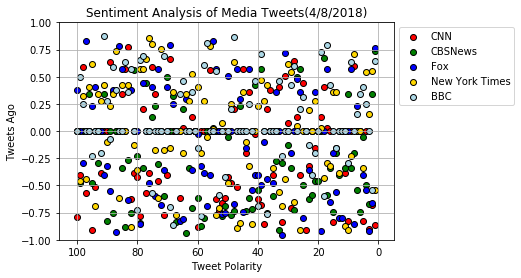

In [4]:
plt.scatter(np.arange(-len(sentiment_df[sentiment_df['User'] == "@CNN"]),0,1),
           sentiment_df[sentiment_df['User'] == "@CNN"]['Compound'], label = "CNN", color = 'red',edgecolor="black")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['User'] == "@CBSNews"]),0,1),
           sentiment_df[sentiment_df['User'] == "@CBSNews"]['Compound'], label = "CBSNews",color = 'green',edgecolor="black" )

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['User'] == "@FoxNews"]),0,1),
           sentiment_df[sentiment_df['User'] == "@FoxNews"]['Compound'], label = "Fox",color = 'blue',edgecolor="black")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['User'] == "@nytimes"]),0,1),
           sentiment_df[sentiment_df['User'] == "@nytimes"]['Compound'], label = "New York Times",color = 'gold',edgecolor="black")

plt.scatter(np.arange(-len(sentiment_df[sentiment_df['User'] == "@BBC"]),0,1),
           sentiment_df[sentiment_df['User'] == "@BBC"]['Compound'], label = "BBC",color = 'lightblue',edgecolor="black")

plt.legend(bbox_to_anchor=(1, 1))
plt.xticks([-100, -80,-60, -40, -20,0], [100, 80, 60, 40, 20,0])
plt.ylim(-1, 1)
plt.title("Sentiment Analysis of Media Tweets(4/8/2018)")
plt.ylabel("Tweets Ago")
plt.xlabel("Tweet Polarity")
plt.grid(True)

plt.savefig("Sentiment Analysis.png")
plt.show()

# Bar Graph

/Users/jessicaburgos/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


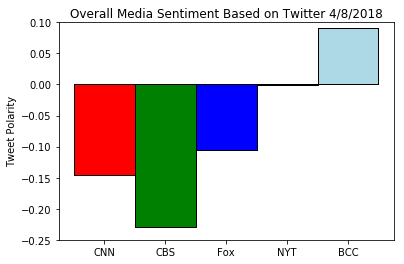

In [5]:
sentiment_means = (sentiment_df[sentiment_df['User'] == "@CNN"]['Compound'].mean(), 
               sentiment_df[sentiment_df['User'] == "@CBSNews"]['Compound'].mean(), 
               sentiment_df[sentiment_df['User'] == "@FoxNews"]['Compound'].mean(), 
               sentiment_df[sentiment_df['User'] == "@nytimes"]['Compound'].mean(),
               sentiment_df[sentiment_df['User'] == "@BBC"]['Compound'].mean())


fig, ax = plt.subplots()
ind = np.arange(len(sentiment_means))  
width = 1
cnn_mean = ax.bar(ind[0], sentiment_means[0], width, color='red',edgecolor="black")
cbs_mean = ax.bar(ind[1:], sentiment_means[1:], width, color='green',edgecolor="black")
fox_mean = ax.bar(ind[2:], sentiment_means[2:], width, color='blue',edgecolor="black")
ny_mean = ax.bar(ind[3:], sentiment_means[3:], width, color='gold',edgecolor="black")
bbc_mean = ax.bar(ind[4:], sentiment_means[4:], width, color='lightblue',edgecolor="black")


ax.set_ylabel('Tweet Polarity')
ax.set_title('Overall Media Sentiment Based on Twitter 4/8/2018')
ax.set_xticks(ind )
ax.set_xticklabels(('CNN', 'CBS', 'Fox', 'NYT', 'BCC'))

ax.set_autoscaley_on(False)
ax.set_ylim([-.25,.1])

plt.savefig("Overall Media Sentiment.png")
fig.show()

In [6]:
sentiment_df[sentiment_df['User'] == "@nytimes"]['Compound'].mean()

-0.000781999999999996